# Тестовое задание
К стажировке в М.Тех, для вакансии «Младший исследователь данных (DS)».

## Описание данных

Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. 

В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска. 

# Критерии, которые важны заказчику:

Необходимо проверить следующие гипотезы:
- Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.
- Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

Решение необходимо предоставить:
- В виде jupyter notebook (с аккуратно оформленным кодом, графиками и 
описанной логикой решения).
- В виде дашборда на Streamlit с простым функционалом: 
  - должна быть возможность загрузить .csv, в формате аналогично файлу «Статистика»
  - должна быть возможность задать параметры age и work_days
  - указан результат проверки гипотез
  - указана логика получения результата (должны быть отрисованы графики распределений, указаны критерии проверки (стат. тесты, статистики, уровень значимости т.п.) 

### Описание данных

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-и-ознакомление-с-данными" data-toc-modified-id="Загрузка-и-ознакомление-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и ознакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Бибилиотеки" data-toc-modified-id="Бибилиотеки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Бибилиотеки</a></span></li><li><span><a href="#Откроем-и-изучим-файлы" data-toc-modified-id="Откроем-и-изучим-файлы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Откроем и изучим файлы</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Общая информация</a></span></li></ul></li><li><span><a href="#Вывод-по-итогу-исследования-данных" data-toc-modified-id="Вывод-по-итогу-исследования-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод по итогу исследования данных</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Гипотеза 1</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-итогу-проверки-гипотезы-1" data-toc-modified-id="Вывод-по-итогу-проверки-гипотезы-1-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Вывод по итогу проверки гипотезы 1</a></span></li></ul></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Гипотеза 2</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-итогу-проверки-гипотезы-2" data-toc-modified-id="Вывод-по-итогу-проверки-гипотезы-2-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Вывод по итогу проверки гипотезы 2</a></span></li></ul></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

## Загрузка и ознакомление с данными

### Бибилиотеки

In [1]:
# подготавливаем рабочее пространство
# загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import statistics

import re
from io import StringIO

from scipy import stats as st
from scipy.stats import binom, norm

In [2]:
from ydata_profiling import ProfileReport

### Откроем и изучим файлы

#### Общая информация

In [3]:
try:
    with open('М.Тех_Данные_к_ТЗ_DS.csv') as f:
        text = re.sub(r'"*([\r\n])+"*|(?:^"*|"*$)|""', '\\1', f.read())
    fixed_text = StringIO(text)
    
    df = pd.read_csv(fixed_text)
except:
    print('Попробуем еще раз')

In [4]:
styles = [dict(selector="caption", props=[("font-size", "150%"),
                                          ("font-weight", "bold")])]

display(df.head(3).style.set_caption('Информация о сотрудниках').set_table_styles(styles))
print(f"Количество явных дубликатов: {df.duplicated().sum()}\n")
df.info()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М


Количество явных дубликатов: 72

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


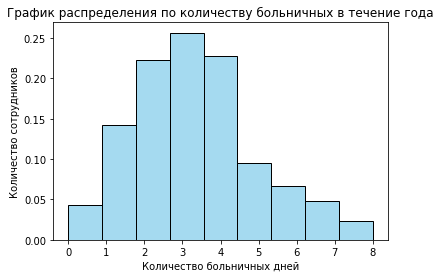

In [5]:
sns.histplot(data=df, x="Количество больничных дней", color="skyblue", stat='density', bins=9)
plt.title('График распределения по количеству больничных в течение года')
plt.ylabel('Количество сотрудников')
plt.xlabel('Количество больничных дней')
plt.show()

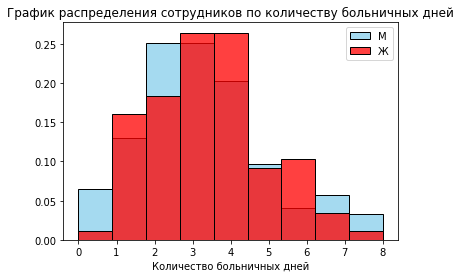

In [6]:
sns.histplot(data=df.loc[df['Пол']=='М'], x="Количество больничных дней",
             color="skyblue", label="М", stat='density', bins=9)
sns.histplot(data=df.loc[df['Пол']=='Ж'], x="Количество больничных дней",
             color="red", label="Ж", stat='density', bins=9)
plt.legend() 
plt.title("График распределения сотрудников по количеству больничных дней")
plt.ylabel(' ')
plt.xlabel('Количество больничных дней')
plt.show()

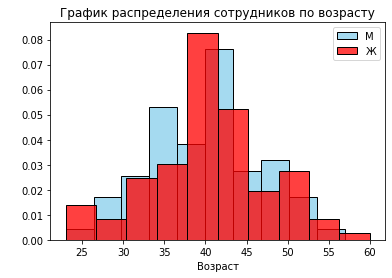

In [7]:
sns.histplot(data=df.loc[df['Пол']=='М'], x="Возраст", color="skyblue", label="М", stat='density', bins=10)
sns.histplot(data=df.loc[df['Пол']=='Ж'], x="Возраст", color="red", label="Ж", stat='density', bins=10)
plt.legend() 
plt.title("График распределения сотрудников по возрасту")
plt.ylabel(' ')
plt.xlabel('Возраст')
plt.show()

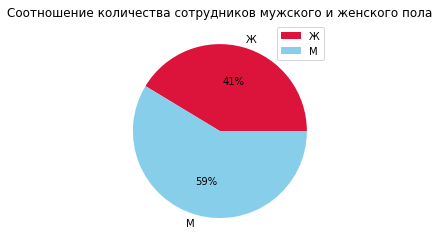

In [8]:
(df
 .pivot_table(index='Пол', aggfunc='count')
 .plot.pie(y='Возраст', autopct='%1.0f%%', colors=['crimson', 'skyblue'])
)
plt.title("Соотношение количества сотрудников мужского и женского пола")
plt.ylabel(" ")
plt.show()

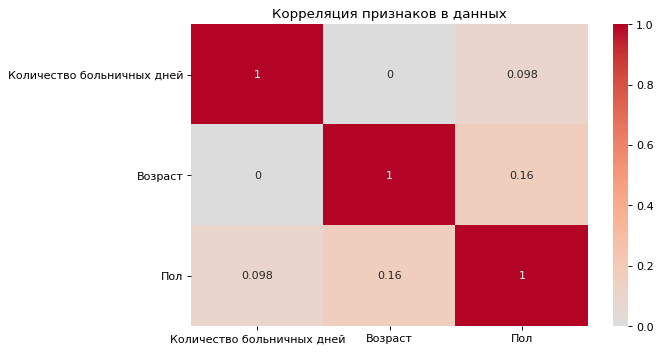

In [9]:
INTERVAL_COLS = ['Количество больничных дней', 'Возраст']
corr_table = df.phik_matrix(interval_cols=INTERVAL_COLS)

figure(figsize=(8, 5), dpi=80)
sns.heatmap(corr_table, annot=True, annot_kws={"size": 10}, cmap='coolwarm', center=0)
plt.title('Корреляция признаков в данных')
plt.show()

### Вывод по итогу исследования данных


- присутствуют явные дубликаты (однако, удалять их будет не корректно, поскольку выбросы в данных отсутствуют. Будем считать наличие дубликатов при таких признаках вполне естественным);
- пропуски отсутствуют;

В распределении по половому признаку отсутствует явный дизбаланс классов.

Категоризированные по половому признаку данные имеют нормальные распределения и по количеству больничных дней, и по возрасту.

Корреляция в данных относительно `Количества больничных дней` практически отсутствует, будем считать ее незначительной.

## Проверка гипотез

In [10]:
work_days = 2
age = 35

In [11]:
df_hip = df.loc[df['Количество больничных дней'] >= work_days]

### Гипотеза 1

Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

---

- нулевая гипотеза - Мужчины пропускают в течение года более 2 рабочих дней по болезни столько же, сколько женщины
- альтернативная гипотеза - Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.

Используем метод `scipy.stats.ttest_ind()`, поскольку необходимо сравнить 2 набора данных, которые не зависят друг от друга.

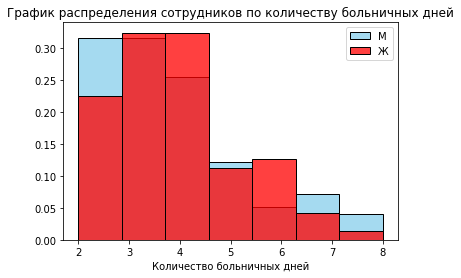

In [12]:
sns.histplot(data=df_hip.loc[df_hip['Пол']=='М'], x="Количество больничных дней",
             color="skyblue", label="М", stat='density', bins=9-work_days)
sns.histplot(data=df_hip.loc[df_hip['Пол']=='Ж'], x="Количество больничных дней",
             color="red", label="Ж", stat='density', bins=9-work_days)
plt.legend() 
plt.title("График распределения сотрудников по количеству больничных дней")
plt.ylabel(' ')
plt.xlabel('Количество больничных дней')
plt.show()

In [13]:
alpha = 0.05 # уровень статистической значимости

test_m = df_hip.loc[df_hip['Пол']=='М']['Количество больничных дней']
test_w = df_hip.loc[df_hip['Пол']=='Ж']['Количество больничных дней']

results_hip_1 = st.ttest_ind(test_m, test_w, alternative='greater', equal_var=False)

In [14]:
print(f'Установленный уровень статистической значимости: {alpha}')
print(f'Значение p-value для наблюдаемого на выборке значения: {results_hip_1.pvalue}')
print()
if results_hip_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Установленный уровень статистической значимости: 0.05
Значение p-value для наблюдаемого на выборке значения: 0.6798866865927702

Нет оснований отвергнуть нулевую гипотезу


In [15]:
print('Список характерных значений М:')
display(test_m.describe())
print()
print('Список характерных значений Ж:')
display(test_w.describe())

Список характерных значений М:


count    115.000000
mean       3.704348
std        1.632853
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: Количество больничных дней, dtype: float64


Список характерных значений Ж:


count    83.000000
mean      3.807229
std       1.443723
min       2.000000
25%       3.000000
50%       4.000000
75%       4.500000
max       8.000000
Name: Количество больничных дней, dtype: float64

#### Вывод по итогу проверки гипотезы 1

Нулевую гипотезу о том, мужчины пропускают в течение года более 2 рабочих дней по болезни столько же, сколько женщины, нельзя отвергнуть.

Дополнительно, гипотезу о равенстве усиливает анализ списка характерных значений.

### Гипотеза 2

Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

---

- нулевая гипотеза - Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни столько же, сколько их молодые коллеги.
- альтернативная гипотеза - Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.

Используем метод `scipy.stats.ttest_ind()`, поскольку необходимо сравнить 2 набора данных, которые не зависят друг от друга.

Юридически в день достижения 35-летнего возраста сотрудник попадает в группу «старше 35 лет». Таким образом 35 лет и 1 день/неделя/месяц – всё это старше 35 лет.


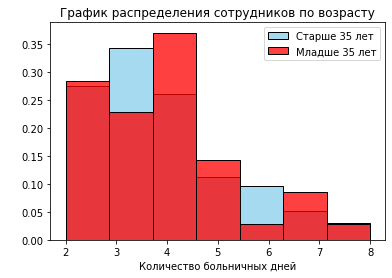

In [16]:
sns.histplot(data=df_hip.loc[df_hip['Возраст']>=age], x="Количество больничных дней",
             color="skyblue", label=f"Старше {age} лет", stat='density', bins=9-work_days)
sns.histplot(data=df_hip.loc[df_hip['Возраст']<age], x="Количество больничных дней",
             color="red", label=f"Младше {age} лет", stat='density', bins=9-work_days)
plt.legend() 
plt.title("График распределения сотрудников по возрасту")
plt.ylabel(' ')
plt.xlabel('Количество больничных дней')
plt.show()

In [17]:
alpha = 0.05 # уровень статистической значимости

test_old = df_hip.loc[df_hip['Возраст']>=age]['Количество больничных дней']
test_yng = df_hip.loc[df_hip['Возраст']<age]['Количество больничных дней']

results_hip_2 = st.ttest_ind(test_old, test_yng, alternative='greater', equal_var=False)

In [18]:
print(f'Установленный уровень статистической значимости: {alpha}')
print(f'Значение p-value для наблюдаемого на выборке значения: {results_hip_2.pvalue}')
print()
if results_hip_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Установленный уровень статистической значимости: 0.05
Значение p-value для наблюдаемого на выборке значения: 0.6035313889320407

Нет оснований отвергнуть нулевую гипотезу


In [19]:
print(f'Список характерных значений сотрудников старше:')
display(test_old.describe())
print()
print(f'Список характерных значений Ж:')
display(test_yng.describe())

Список характерных значений сотрудников старше:


count    157.000000
mean       3.732484
std        1.554077
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: Количество больничных дней, dtype: float64


Список характерных значений Ж:


count    41.000000
mean      3.804878
std       1.568750
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       8.000000
Name: Количество больничных дней, dtype: float64

#### Вывод по итогу проверки гипотезы 2

Нулевую гипотезу о том, работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни столько же, сколько их молодые коллеги, нельзя отвергнуть.

Дополнительно, гипотезу о равенстве усиливает анализ списка характерных значений.

## Итоговый вывод

Результаты исследования данных подтверждаются проверкой гипотиз с помощью т-тестов. Обе гипотзы не являются однозначиными и скорее подойдут гипотеры о равенстве значений для нашей выборки сотрудников.